# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
!pip install ip2geotools



 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [ ]:

from zipfile import ZipFile

def read_HTWblog(web_filename):
  unzip_weblog = ZipFile(web_filename)

  unzip_names = unzip_weblog.namelist()
  #print("Zipinfo as below :\n",unzip_weblog.infolist())
  number_of_files = len(unzip_weblog.infolist())
  
  print("Zipfiles names_list :\n", unzip_names)  
  print("\n--------------------------------\n") 
  print('The total number of files loading is: ',number_of_files )
 
 # list to store whole dataframe in order to concat  
  files = [] 
  
  for file_name in unzip_names:
    file_content = unzip_weblog.read(file_name).decode('latin1') # or iso-8859-1
    
    header_line = file_content.split("\r\n")[3].split(" ")[1:-1] #the fourth line is header
    
    rows = file_content.split("\r\n") # each row(record) separate by \r\n 
    
    each_line_list = [] #create list store each line 
    
    for line in rows:  
        # if len(each record) = len(attributes)
        if len(line.split(" ")) == len(header_line): 
            row = line.split(" ") #each record separate by " "
            each_line_list.append(row) #add each record to data_list
        else:
          pass
    
    each_file = pd.DataFrame(each_line_list, columns = header_line) # create dataframe for each file
    
    files.append(each_file)
  
  df_ht = pd.concat(files) #concat all files into dataframe 
  
  return df_ht




In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#!ls
#df_ht = read_HTWblog('/content/gdrive/MyDrive/HTWebLog_p1.zip')

df_ht = read_HTWblog('HTWebLog_p1.zip')

Zipfiles names_list :
 ['ex061101.log', 'ex061102.log', 'ex061103.log', 'ex061104.log', 'ex061105.log', 'ex061106.log', 'ex061107.log', 'ex061108.log', 'ex061109.log', 'ex061110.log', 'ex061111.log', 'ex061112.log', 'ex061113.log', 'ex061114.log', 'ex061115.log', 'ex061116.log', 'ex061117.log', 'ex061118.log', 'ex061119.log', 'ex061120.log', 'ex061121.log', 'ex061122.log', 'ex061123.log', 'ex061124.log', 'ex061125.log', 'ex061126.log', 'ex061127.log', 'ex061128.log', 'ex061129.log', 'ex061130.log', 'ex061201.log', 'ex061202.log', 'ex061203.log', 'ex061204.log', 'ex061205.log', 'ex061206.log', 'ex061207.log', 'ex061208.log', 'ex061209.log', 'ex061210.log', 'ex061211.log', 'ex061212.log', 'ex061213.log', 'ex061214.log', 'ex061215.log', 'ex061216.log', 'ex061217.log', 'ex061218.log', 'ex061219.log', 'ex061220.log', 'ex061221.log', 'ex061222.log', 'ex061223.log', 'ex061224.log', 'ex061225.log', 'ex061226.log', 'ex061227.log', 'ex061228.log', 'ex061229.log', 'ex061230.log', 'ex061231.log', 

 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [ ]:

print("\nData size :",df_ht.shape)
print("\nNumber of records :",len(df_ht))
print("\nNumber of atrributes :",len(df_ht.columns))
print('--------------------------------------')

#attribute name
print('\nAttribute name:\n')

print(df_ht.columns.to_list())


Data size : (8438928, 15)

Number of records : 8438928

Number of atrributes : 15
--------------------------------------

Attribute name:

['date', 'time', 's-sitename', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'sc-status', 'sc-substatus', 'sc-win32-status']


In [ ]:
df_ht.head(5)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


**check missing value and replace**

In [ ]:
#insepct dataset each column
for col in df_ht.columns:
      print('\n\n--------------------------')
      print('The number of unique {}:'.format(col),df_ht[col].nunique() )
      print(col, ":")
      print(df_ht[col].value_counts(), "\n")



--------------------------
The number of unique date: 121
date :
2006-12-12    120190
2006-11-27    120019
2006-12-14    118609
2006-12-13    117075
2006-12-08    113063
               ...  
2007-02-18     30750
2007-01-01     30355
2006-12-31     29400
2007-02-17     26484
2007-03-01         1
Name: date, Length: 121, dtype: int64 



--------------------------
The number of unique time: 86372
time :
08:37:00    382
09:55:14    375
09:13:05    358
04:41:05    349
06:30:22    343
           ... 
21:53:06      1
20:26:53      1
20:37:30      1
21:24:30      1
19:04:59      1
Name: time, Length: 86372, dtype: int64 



--------------------------
The number of unique s-sitename: 1
s-sitename :
W3SVC1    8438928
Name: s-sitename, dtype: int64 



--------------------------
The number of unique s-ip: 1
s-ip :
127.0.0.1    8438928
Name: s-ip, dtype: int64 



--------------------------
The number of unique cs-method: 6
cs-method :
GET         8421984
POST           9509
HEAD           6723

In [ ]:
print('Find missing value is "-"')

Find missing value is "-"


In [ ]:
#replace missing with NAN
df_ht.replace('-', np.nan, inplace = True)

#missing counts by column
print(df_ht.isnull().sum(axis=0))


date                     0
time                     0
s-sitename               0
s-ip                     0
cs-method                0
cs-uri-stem              0
cs-uri-query       7886532
s-port                   0
cs-username        8438928
c-ip                     0
cs(User-Agent)        3527
cs(Referer)        1308994
sc-status                0
sc-substatus             0
sc-win32-status          0
dtype: int64


In [ ]:
#missing value percentage
missing_value = (df_ht.isnull().sum(axis=0)*100/len(df_ht))\
                    .reset_index().rename(
                      columns = {"index": "columns", 
                                 0: "% percent of missing value"})\
                          .sort_values(
                              by="% percent of missing value", 
                              ascending=False)

print(missing_value[missing_value['% percent of missing value'] != 0])



           columns  % percent of missing value
8      cs-username                  100.000000
6     cs-uri-query                   93.454192
11     cs(Referer)                   15.511378
10  cs(User-Agent)                    0.041794


In [ ]:
# remove columns have above 15% missing value
drop_columns = list(missing_value[missing_value['% percent of missing value'] > 15]['columns'])

print('After dropping columns above 15% missing values\n')
df_ht.drop(columns = drop_columns , axis =1, inplace = True)

print(df_ht.isnull().sum())
print(df_ht.shape)


After dropping columns above 15% missing values

date                  0
time                  0
s-sitename            0
s-ip                  0
cs-method             0
cs-uri-stem           0
s-port                0
c-ip                  0
cs(User-Agent)     3527
sc-status             0
sc-substatus          0
sc-win32-status       0
dtype: int64
(8438928, 12)


In [ ]:
#remove any records with missing values
df_ht.dropna( axis=0 , how = 'any',inplace = True)
print('After drop any records with mising value\n')
print(df_ht.isnull().sum())

After drop any records with mising value

date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64


In [ ]:
df_ht.shape

(8435401, 12)

## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



In [ ]:
#construct datetime format in order to get hour

df_ht['date_time'] = df_ht['date'] +" "+ df_ht['time']
df_ht['date_time'] = pd.to_datetime(df_ht['date_time'], format = "%Y-%m-%d %H:%M:%S")
df_ht.drop(['date','time'], axis =1 ,inplace=True) 

#get hour
df_ht['hour'] = df_ht['date_time'].apply(lambda x : x.hour)
df_ht[['hour','date_time']]


,hour,date_time
0,0,2006-11-01 00:00:08
1,0,2006-11-01 00:00:08
2,0,2006-11-01 00:00:08
3,0,2006-11-01 00:00:09
4,0,2006-11-01 00:00:09
...,...,...
63741,23,2007-02-28 23:59:57
63742,23,2007-02-28 23:59:57
63743,23,2007-02-28 23:59:57
63744,23,2007-02-28 23:59:57


In [ ]:
#insepct hour_request
print('\n\n\n-----------Unique Time Hour-----------\n')
print(df_ht['hour'].unique())
print('\n\n\n-----------Time Hour Counts-----------\n')
df_ht['hour'].value_counts(sort =False)




-----------Unique Time Hour-----------

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]



-----------Time Hour Counts-----------



0     155914
1     344334
2     432290
3     546655
4     529352
5     487330
6     544734
7     522365
8     550744
9     553564
10    443519
11    368948
12    367635
13    442429
14    493695
15    473057
16    387291
17    250285
18    159546
19     93829
20     72559
21     66474
22     65218
23     83634
Name: hour, dtype: int64

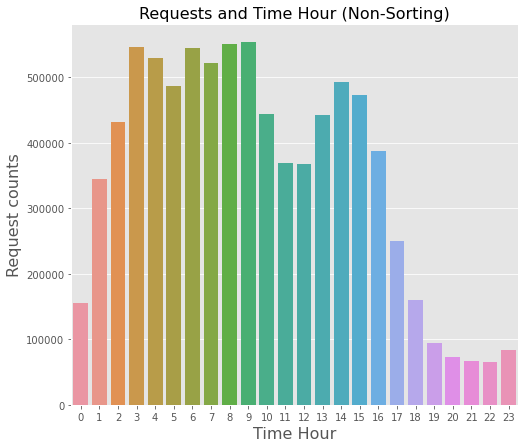

In [ ]:
#!pip install seaborn
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize =(8,7))
sns.countplot(x= 'hour', data =df_ht)

plt.ylabel('Request counts', fontsize =16)
plt.xlabel('Time Hour',fontsize =16)
plt.title("Requests and Time Hour (Non-Sorting)",fontsize =16)
plt.show()
#plt.savefig('hour_bar_chart_1')

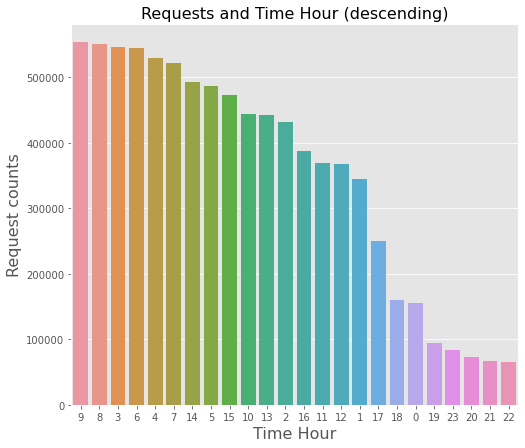

In [ ]:
# with sorting fig 2
plt.figure(figsize =(8,7))

sns.countplot(x= 'hour', data =df_ht, order=df_ht['hour'].value_counts(sort=True).index )

plt.title("Requests and Time Hour (descending)",fontsize =16)
plt.ylabel('Request counts', fontsize =16)
plt.xlabel('Time Hour',fontsize =16)

#plt.savefig('hour_bar_chart_2')
plt.show()


<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [ ]:
filter_hour= df_ht['hour'].value_counts().reset_index()

#condition 
filter_condition = ((filter_hour['hour'] >= 400000) & (filter_hour['hour'] <= 490000))

filter_hour = filter_hour[filter_condition]

filter_hour = filter_hour.rename(columns ={'index': 'Filter Hour',
                               'hour': 'Request Counts'})\
                               .reset_index(drop=True)

#filter_hour.to_csv('filter_hour_table.csv', index=False)
filter_hour

,Filter Hour,Request Counts
0,5,487330
1,15,473057
2,10,443519
3,13,442429
4,2,432290


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

#### Server Status

In [ ]:
# construct dataframe from serve status
print('The number of unique server status type:',df_ht['sc-status'].nunique())

print('\n\n------------Server type counts-------------')
df_ht['sc-status'].value_counts()

The number of unique server status type: 12


------------Server type counts-------------


200    6072524
304    2136930
404     142583
206      72472
302       7366
500       2013
403        700
301        433
400        210
501        113
406         54
416          3
Name: sc-status, dtype: int64

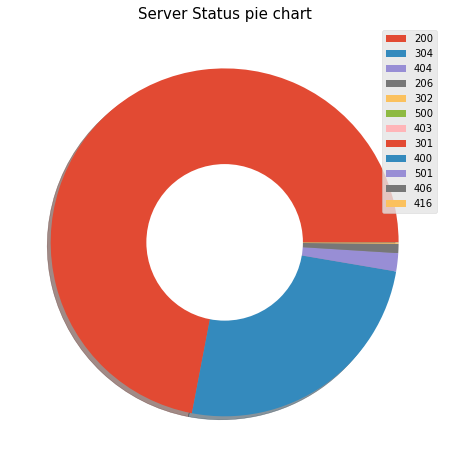

200    71.988563
304    25.332880
404     1.690293
206     0.859141
302     0.087322
500     0.023864
403     0.008298
301     0.005133
400     0.002490
501     0.001340
406     0.000640
416     0.000036
Name: sc-status, dtype: float64

In [ ]:
pie_server = df_ht['sc-status'].value_counts()

plt.figure(figsize = (8,8))

plt.pie(pie_server.values,
           shadow = True,
        textprops={'fontsize': 13})
plt.title('Server Status pie chart', fontsize = 15)

plt.legend(labels =pie_server.index )

centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 

plt.show()

df_ht['sc-status'].value_counts()*100/ len(df_ht['sc-status'])


### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

**#1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59.**

In [ ]:
from ip2geotools.databases.noncommercial import DbIpCity

time_condition = (df_ht['date_time'] >= '2007-01-01 20:00:00') & (df_ht['date_time'] <= '2007-01-01 20:59:59')

Geo_df = df_ht[time_condition][['date_time', 'hour', 'c-ip']]

#check if all Time hour is 20(20:00:00 :20:59:59)
print('All Time hour is 20:00:00 :20:59:59 : ')
print(all(Geo_df['hour'] == 20))

print('\n\nRequest Amount : ',Geo_df.shape[0] )
Geo_df



All Time hour is 20:00:00 :20:59:59 : 
True


Request Amount :  214


,date_time,hour,c-ip
28823,2007-01-01 20:00:00,20,210.184.71.81
28824,2007-01-01 20:00:00,20,210.184.71.81
28825,2007-01-01 20:01:12,20,62.211.200.146
28826,2007-01-01 20:01:48,20,62.211.200.146
28827,2007-01-01 20:01:57,20,62.211.200.146
...,...,...,...
29032,2007-01-01 20:52:46,20,74.6.85.161
29033,2007-01-01 20:52:48,20,74.6.85.206
29034,2007-01-01 20:59:04,20,202.160.178.181
29035,2007-01-01 20:59:40,20,74.6.75.47


**#2. Discover on the demographics by analysing requests from country level.**

In [ ]:
#function get country
country_level = lambda ip : DbIpCity.get(ip, api_key='free').country

#apply function to column
Geo_df['country_level'] = Geo_df['c-ip'].apply(country_level)

In [ ]:
print(Geo_df['country_level'].unique())

Geo_df['country_level'].value_counts()


['HK' 'IT' 'CN' 'US' 'AU']


HK    169
CN     25
US     16
IT      3
AU      1
Name: country_level, dtype: int64

**#3. Plot countries of all requests in pie chart. **

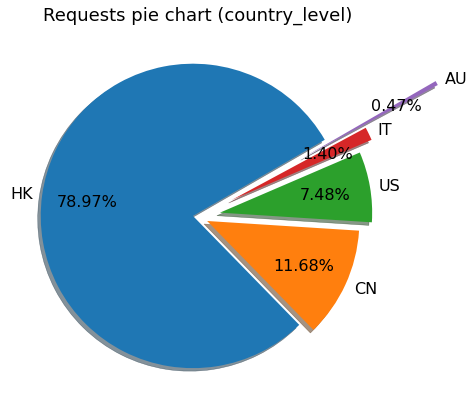

HK    78.971963
CN    11.682243
US     7.476636
IT     1.401869
AU     0.467290
Name: country_level, dtype: float64

In [ ]:

pie_Country = Geo_df['country_level'].value_counts()
#shuffle order of labels and values
plt.figure(figsize =(7,7))
explode = [.03, .07, .15, .25, .8]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.pie(pie_Country.values,labels = pie_Country.index,
        shadow= True, autopct= "%.2f%%",
        explode=explode, colors = colors,
        textprops={'fontsize': 16},
        pctdistance=.7, labeldistance=1.06,
        startangle= 30)

plt.title('Requests pie chart (country_level)', fontsize = 18)
plt.show()

Geo_df['country_level'].value_counts()*100/len(Geo_df)


**#4. List top 3 with the numbers of requests.**


In [ ]:
pie_Country[:3]

HK    169
CN     25
US     16
Name: country_level, dtype: int64

#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

**1. Discover on the demographics by analysing requests from city level.** 

In [ ]:

city_level = lambda ip : DbIpCity.get(ip, api_key='free').city

Geo_df['city_level'] = Geo_df['c-ip'].apply(city_level)



In [ ]:
print(Geo_df['city_level'].unique())

Geo_df['city_level'].value_counts()


['Hong Kong' 'Valcanneto' 'Jinrongjie (Xicheng District)' 'Quarry Bay'
 'Beijing' 'San Francisco (Financial District)' 'Sydney' 'New York'
 'Hangzhou' 'Mountain View' 'Ha Kwai Chung']


Ha Kwai Chung                         166
Beijing                                15
New York                               14
Jinrongjie (Xicheng District)           9
Valcanneto                              3
Hong Kong                               2
Quarry Bay                              1
Hangzhou                                1
San Francisco (Financial District)      1
Sydney                                  1
Mountain View                           1
Name: city_level, dtype: int64

**2. Plot cities of all requests in pie chart. **

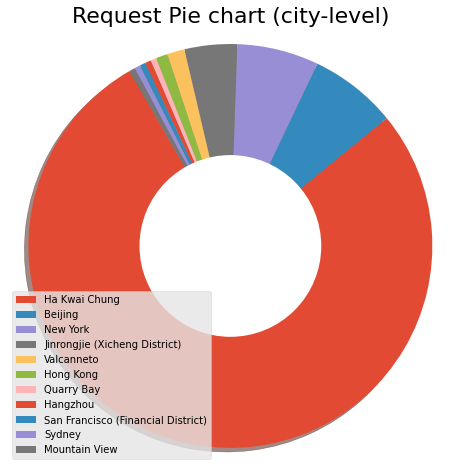

Ha Kwai Chung                         77.570093
Beijing                                7.009346
New York                               6.542056
Jinrongjie (Xicheng District)          4.205607
Valcanneto                             1.401869
Hong Kong                              0.934579
Quarry Bay                             0.467290
Hangzhou                               0.467290
San Francisco (Financial District)     0.467290
Sydney                                 0.467290
Mountain View                          0.467290
Name: city_level, dtype: float64

In [ ]:
pie_City = Geo_df['city_level'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(pie_City.values, 
        shadow= True,
       startangle= 120,
        textprops={'fontsize': 12})

plt.title("Request Pie chart (city-level)", fontsize = 22)
plt.legend(labels = pie_City.index)
plt.axis("equal")

centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 

plt.show()
Geo_df['city_level'].value_counts()*100 / len(Geo_df)

**3. List top 3 with the numbers of requests.**

In [ ]:
pie_City[:3]

Ha Kwai Chung    166
Beijing           15
New York          14
Name: city_level, dtype: int64

# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [ ]:
# write your import and necessary web crawling libary here
!pip install selenium
!pip install bs4
!pip install requests
import requests 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from time import sleep

### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [ ]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name 
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])


def professors_list(web_link):
  webpage_response = requests.get(web_link, 'html.parsers')
  
  print(webpage_response)
  print("-------------------------------\n")
  webpage = BeautifulSoup(webpage_response.content, "html.parser")
  
  #crawl all text from td
  professor_list = [i.string for i in webpage.find_all('td')] 
  
  #dealing with missing value in case error
  professor_list = [i for i in professor_list if i != None] 
  
  professor_list_update = []
  
  select_list = ['Professor', "Associate Professor", "Emeritus Professor"]
  
  #filtering title that we do need 
  for professor in professor_list:
    if any([select_element in professor for select_element in select_list]):
      professor_list_update.append(professor)
    else:
      pass
  
  #second filtering title that we do not need 
  second_select = ['Adjunct', 'Honorary']
  professor_list_update_second = []
  
  for professor in professor_list_update:
    if any([select_element in professor for select_element in second_select]):
      pass
    else:
      professor_list_update_second.append(professor)
  
  print('\nOriginal list(5 samples)\n',professor_list[-5:] )
  print('\n---\nFirst filtering(5 samples)\n', professor_list_update[-5:])
  print('\n---\nSecond filtering(5 samples)\n', professor_list_update_second[-5:])
  return professor_list_update_second


In [ ]:
pro_data = professors_list("https://www.deakin.edu.au/information-technology/staff-listing")

<Response [200]>
-------------------------------


Original list(5 samples)
 ['Jesse Mcmeikan', 'Thuy Nguyen', 'Michelle Yu', 'Nghia Dang', 'Justin Li']

---
First filtering(5 samples)
 ['Adjunct Professor Jamie Rossato', 'Adjunct Professor Chadi Saliby', 'Adjunct Professor Malcolm Shore', 'Adjunct Professor EJ Wise', 'Professor Abbas Kudrati']

---
Second filtering(5 samples)
 ['Associate Professor Jianxin Li', 'Associate Professor Xiao Liu', 'Associate Professor Vicky Mak', 'Associate Professor Tim Wilkin', 'Professor Abbas Kudrati']


In [ ]:
print("\n\n**Length of professors data:", len(pro_data))
pro_data



**Length of professors data: 26


['Emeritus Professor Lynn Batten',
 'Emeritus Professor Andrzej Goscinski',
 'Professor Jemal Abawajy',
 'Professor Maia Angelova',
 'Professor Gleb Beliakov',
 'Professor Terry Caelli',
 'Professor Jinho Choi',
 'Professor Chang-Tsun Li',
 'Professor Robin Doss',
 'Professor Peter Eklund',
 'Professor Seng Loke',
 'Professor Antonio Robles-Kelly',
 'Professor Jean-Guy Schneider',
 'Professor Yong Xiang',
 'Professor John Yearwood',
 'Professor Arkady Zaslavsky',
 'Associate Professor Mohamed Abdelrazek',
 'Associate Professor Andrew Cain',
 'Associate Professor Richard Dazeley',
 'Associate Professor Guangyan Huang',
 'Associate Professor Gang Li',
 'Associate Professor Jianxin Li',
 'Associate Professor Xiao Liu',
 'Associate Professor Vicky Mak',
 'Associate Professor Tim Wilkin',
 'Professor Abbas Kudrati']

In [ ]:
# using parse_name method 
professor_full_name = [parse_name(i)[0] for i in pro_data]
professor_title = [parse_name(i)[1] for i in pro_data]

#make a dataframe
df_professor_data = pd.DataFrame(
      list(zip(
          professor_full_name,
          professor_title,
      ["Deakin University" for i in range(len(professor_full_name))]
      )),
     columns= ["Name", "Title", "University"]
)

#save csv
#df_professor_data.to_csv('Professor-list.csv', index=False)

# The column name must be same as the provided professor-list.csv
df_professor_data


,Name,Title,University
0,Lynn Batten,Emeritus Professor,Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
3,Maia Angelova,Professor,Deakin University
4,Gleb Beliakov,Professor,Deakin University
5,Terry Caelli,Professor,Deakin University
6,Jinho Choi,Professor,Deakin University
7,Chang-Tsun Li,Professor,Deakin University
8,Robin Doss,Professor,Deakin University
9,Peter Eklund,Professor,Deakin University


## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 
<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [ ]:
def profile_url(professor_name):
    search_input = professor_name +' Deakin'
    
    driver = webdriver.Chrome()
    driver.get("https://scholar.google.com")
    #google schloar seach input
    #search = driver.find_element_by_id('gs_hdr_tsi')
    search = driver.find_element_by_css_selector('input[name= "q"]')
    
    search.send_keys(search_input)# search professor name
    search.send_keys(Keys.RETURN) #return result
    sleep(5)
    #if professor has profile page
    
    try:
        profile_url = driver.find_element_by_css_selector('h4.gs_rt2>a').get_attribute('href')
        driver.get(profile_url) # get profile page
        sleep(5)
        #use soup to get content on profile page
        webpage_response = requests.get(profile_url, 'html.parsers')
        webpage = BeautifulSoup(webpage_response.content, "html.parser")
        #get citation information and store in list
        citation = [i.string for i in webpage.find_all('td', {'class':"gsc_rsb_std"})]
        
    #if professor has no such profile page
    except NoSuchElementException:
        citation = ['na' for i in range(6)] 
        pass
    
    driver.close()
    return citation


In [ ]:
#make a copy 
df_professor_citation = df_professor_data.copy()

#apply function to column 
df_professor_citation['citation'] = df_professor_citation['Name'].apply(profile_url)
df_professor_citation

cp_professor_citation= df_professor_citation.copy()

In [ ]:
df_professor_citation


,Name,Title,University,citation
0,Lynn Batten,Emeritus Professor,Deakin University,"[2527, 1171, 23, 16, 45, 21]"
1,Andrzej Goscinski,Emeritus Professor,Deakin University,"[na, na, na, na, na, na]"
2,Jemal Abawajy,Professor,Deakin University,"[na, na, na, na, na, na]"
3,Maia Angelova,Professor,Deakin University,"[680, 397, 15, 11, 21, 14]"
4,Gleb Beliakov,Professor,Deakin University,"[8174, 4633, 42, 32, 135, 86]"
5,Terry Caelli,Professor,Deakin University,"[8661, 1475, 51, 20, 176, 36]"
6,Jinho Choi,Professor,Deakin University,"[7812, 5021, 37, 29, 167, 95]"
7,Chang-Tsun Li,Professor,Deakin University,"[4341, 2336, 33, 21, 104, 65]"
8,Robin Doss,Professor,Deakin University,"[na, na, na, na, na, na]"
9,Peter Eklund,Professor,Deakin University,"[3963, 779, 34, 14, 72, 23]"


In [ ]:
#spread column to multiple columns
citation_col_names = ['citation-all','citation-since2016','h-index-all','h-index-since2016','i10-index-all','i10-index-since2016']

cp_professor_citation[citation_col_names] = pd.DataFrame(cp_professor_citation['citation'].tolist(), index= cp_professor_citation.index)

#drop unnecssary columns
cp_professor_citation.drop(['citation', 'University'],axis =1, inplace = True)

#inspect data
cp_professor_citation

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,Emeritus Professor,2527,1171,23,16,45,21
1,Andrzej Goscinski,Emeritus Professor,na,na,na,na,na,na
2,Jemal Abawajy,Professor,na,na,na,na,na,na
3,Maia Angelova,Professor,680,397,15,11,21,14
4,Gleb Beliakov,Professor,8174,4633,42,32,135,86
5,Terry Caelli,Professor,8661,1475,51,20,176,36
6,Jinho Choi,Professor,7812,5021,37,29,167,95
7,Chang-Tsun Li,Professor,4341,2336,33,21,104,65
8,Robin Doss,Professor,na,na,na,na,na,na
9,Peter Eklund,Professor,3963,779,34,14,72,23


In [ ]:
# save csv
#cp_professor_citation.to_csv('Professor-citation-information.csv', index =False)

### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [ ]:
professor_citation_clean = cp_professor_citation.copy()

professor_citation_clean = professor_citation_clean\
                            .replace('na', np.nan)\
                            .dropna(how = 'any', axis = 0)\
                            .set_index('Name')

# convert data type                            
int_columns = professor_citation_clean.columns.drop('Title')

professor_citation_clean[int_columns] = professor_citation_clean[int_columns].apply(pd.to_numeric)

print(professor_citation_clean.dtypes)
professor_citation_clean

Title                  object
citation-all            int64
citation-since2016      int64
h-index-all             int64
h-index-since2016       int64
i10-index-all           int64
i10-index-since2016     int64
dtype: object


,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
Name,,,,,,,
Lynn Batten,Emeritus Professor,2527,1171,23,16,45,21
Maia Angelova,Professor,680,397,15,11,21,14
Gleb Beliakov,Professor,8174,4633,42,32,135,86
Terry Caelli,Professor,8661,1475,51,20,176,36
Jinho Choi,Professor,7812,5021,37,29,167,95
Chang-Tsun Li,Professor,4341,2336,33,21,104,65
Peter Eklund,Professor,3963,779,34,14,72,23
Seng Loke,Professor,7178,2907,38,21,126,50
Antonio Robles-Kelly,Professor,3654,1533,24,15,62,27


In [ ]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)
# write your code here
professor_citation_clean['citation-all'].sort_values(ascending =False)

Name
Arkady Zaslavsky        14923
Terry Caelli             8661
Gleb Beliakov            8174
Jinho Choi               7812
Seng Loke                7178
Yong Xiang               6301
Chang-Tsun Li            4341
Gang Li                  4110
Peter Eklund             3963
John Yearwood            3785
Antonio Robles-Kelly     3654
Xiao Liu                 3219
Lynn Batten              2527
Mohamed Abdelrazek       1852
Jean-Guy Schneider       1811
Richard Dazeley          1470
Jianxin Li               1465
Guangyan Huang           1125
Maia Angelova             680
Tim Wilkin                387
Vicky Mak                 385
Andrew Cain               289
Name: citation-all, dtype: int64

### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [ ]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)
# write your code here
condition = (professor_citation_clean['Title'] == 'Associate Professor')

professor_citation_clean[condition].sort_values(by = 'i10-index-since2016',ascending = False)

,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
Name,,,,,,,
Gang Li,Associate Professor,4110,2820,28,24,88,60
Xiao Liu,Associate Professor,3219,1749,26,20,52,42
Jianxin Li,Associate Professor,1465,1086,21,18,39,32
Mohamed Abdelrazek,Associate Professor,1852,1252,16,15,27,23
Guangyan Huang,Associate Professor,1125,806,20,18,28,23
Richard Dazeley,Associate Professor,1470,948,16,13,24,15
Tim Wilkin,Associate Professor,387,310,10,10,11,10
Andrew Cain,Associate Professor,289,192,10,8,11,8
Vicky Mak,Associate Professor,385,227,11,8,14,6


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [ ]:
# find out all the professors name who has the citations_since2016 > 2500
# write your code here
con_1 = (professor_citation_clean['Title'] == 'Associate Professor')
con_2 = (professor_citation_clean['Title'] == 'Professor')
con_3 = (professor_citation_clean['citation-since2016'] >2500)

professor_citation_clean[(con_1 | con_2) & con_3].sort_values(by = 'citation-since2016')

,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
Name,,,,,,,
Gang Li,Associate Professor,4110,2820,28,24,88,60
Seng Loke,Professor,7178,2907,38,21,126,50
Gleb Beliakov,Professor,8174,4633,42,32,135,86
Yong Xiang,Professor,6301,4964,40,35,118,95
Jinho Choi,Professor,7812,5021,37,29,167,95
Arkady Zaslavsky,Professor,14923,8324,50,33,177,80
